## Problem Statement:

### A Grocery Store shared the transactional data with you. Your job is to identify the most popular combos that can be suggested to the Grocery Store chain after a thorough analysis of the most commonly occurring sets of menu items in the customer orders. The Store doesn’t have any combo meals. Can you suggest the best combo meals?

### 1 Read the dataset. Perform EDA , Exploratory Analysis and Inferences -> Univariate, Bivariate, and multivariate analysis using data visualization (Weekly, Monthly, Quarterly, Yearly Trends in Sales and Sales Across different Categories of different features in the given data) -> Summarise the inferences

In [68]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from os import system

from warnings import filterwarnings
filterwarnings('ignore')

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
df=pd.read_csv('C:\\Users\\Amit.Jain\\Desktop\\PGP-DSBA\\10-Marketing & Retail Analytics\\Project\\Module-2-project\\dataset_group.csv')
df.head()

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


In [70]:
df.shape

(20641, 3)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_id,20641.0,575.986289,328.557078,1.0,292.0,581.0,862.0,1139.0


In [73]:
df.Order_id.nunique()

1139

In [74]:
df.isnull().sum()

Date        0
Order_id    0
Product     0
dtype: int64

### Univariate Analysis

In [75]:
#Finding unique values for categorical variables
for column in df.columns:
    if column == 'Product':
        print("Field name is ", column.upper(),': and Count for this categories are ',df[column].nunique())
        print(df[column].str.upper().value_counts().sort_values())
        print('\n\n')

Field name is  PRODUCT : and Count for this categories are  37
HAND SOAP                       502
SANDWICH LOAVES                 523
FRUITS                          529
PORK                            531
SUGAR                           533
SPAGHETTI SAUCE                 536
SANDWICH BAGS                   536
PASTA                           542
LAUNDRY DETERGENT               542
TORTILLAS                       543
INDIVIDUAL MEALS                544
YOGURT                          545
KETCHUP                         548
DISHWASHING LIQUID/DETERGENT    551
ALL- PURPOSE                    551
MIXES                           554
MILK                            555
FLOUR                           555
BUTTER                          555
PAPER TOWELS                    556
BEEF                            561
SHAMPOO                         562
COFFEE/TEA                      565
ALUMINUM FOIL                   566
DINNER ROLLS                    567
TOILET PAPER                    569
E

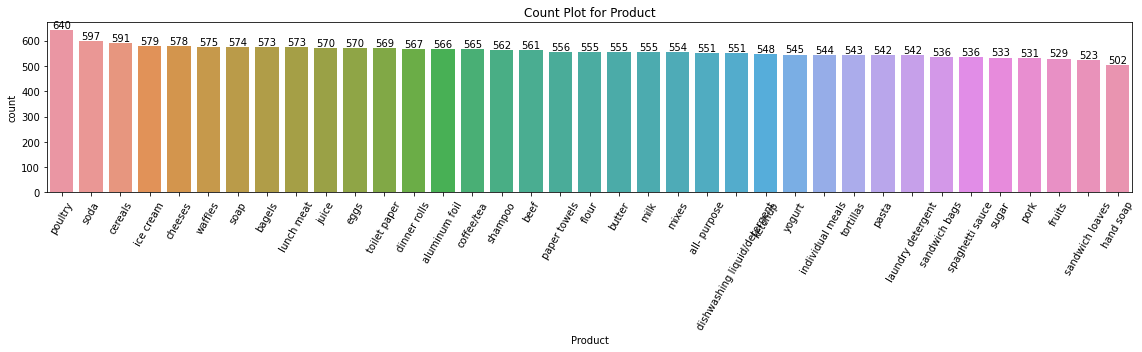

In [76]:
cols= ('Product')

fig, axes = plt.subplots(nrows=1)
fig.set_size_inches(16,5)
ax_count=sns.countplot(x='Product', data=df,order = df['Product'].value_counts().index ) 
ax_count.set(xlabel='Product',title='Count Plot for '+'Product')
plt.xticks(rotation=60)
plt.tight_layout()
for container in ax_count.containers:
    ax_count.bar_label(container)

In [77]:
#df.skew()
df.skew().sort_values(ascending=False)
#calculating skewness before treating outliers present in the data.

Order_id   -0.02807
dtype: float64

In [78]:
basket=df.groupby(['Order_id', 'Product'])['Product'].count().unstack().reset_index().fillna(0).set_index('Order_id')

In [79]:
basket.head()

Product,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,sandwich loaves,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,waffles,yogurt
Order_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [80]:
def encode_zero_one(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [81]:
basket=basket.applymap(encode_zero_one)

In [82]:
itemsets = apriori(basket, min_support = 0.01, use_colnames = True, low_memory=True)
itemsets

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
...,...,...
610567,0.010536,"(soap, spaghetti sauce, sandwich bags, pork, m..."
610568,0.011414,"(soap, spaghetti sauce, sandwich bags, mixes, ..."
610569,0.010536,"(soap, shampoo, poultry, sandwich loaves, laun..."
610570,0.011414,"(shampoo, milk, poultry, sandwich bags, mixes,..."


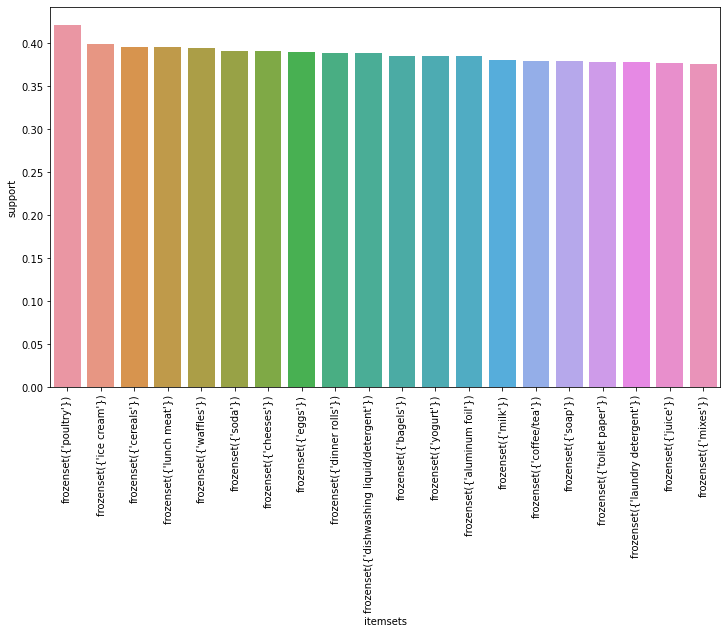

In [83]:
plt.figure(figsize=(12,7))
sns.barplot(itemsets.sort_values('support',ascending=False).iloc[0:20,1],
            itemsets.sort_values('support',ascending=False).iloc[0:20,0])
plt.xticks(rotation=90)
plt.show()

In [84]:
basket = association_rules(itemsets, metric ="lift") 
basket = basket.sort_values(['lift','confidence'], ascending =[False, False]) 

In [85]:
basket.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21916481,"(all- purpose, sugar, sandwich bags, ketchup)","(soap, flour, laundry detergent)",0.023705,0.058824,0.011414,0.481481,8.185185,0.010019,1.815126
21916500,"(soap, flour, laundry detergent)","(all- purpose, sugar, sandwich bags, ketchup)",0.058824,0.023705,0.011414,0.194030,8.185185,0.010019,1.211329
21907009,"(fruits, all- purpose, toilet paper, coffee/tea)","(beef, butter, cereals)",0.022827,0.058824,0.010536,0.461538,7.846154,0.009193,1.747899
21907072,"(beef, butter, cereals)","(fruits, all- purpose, toilet paper, coffee/tea)",0.058824,0.022827,0.010536,0.179104,7.846154,0.009193,1.190374
22026340,"(pork, ice cream, milk, individual meals)","(cereals, shampoo, sandwich loaves)",0.020193,0.067603,0.010536,0.521739,7.717674,0.009170,1.949557
22026385,"(cereals, shampoo, sandwich loaves)","(pork, ice cream, milk, individual meals)",0.067603,0.020193,0.010536,0.155844,7.717674,0.009170,1.160694
22029885,"(cheeses, lunch meat, milk, ketchup)","(soap, pork, coffee/tea)",0.022827,0.065847,0.011414,0.500000,7.593333,0.009910,1.868306
22029896,"(soap, pork, coffee/tea)","(cheeses, lunch meat, milk, ketchup)",0.065847,0.022827,0.011414,0.173333,7.593333,0.009910,1.182064
21916488,"(all- purpose, sugar, laundry detergent, ketchup)","(soap, flour, sandwich bags)",0.025461,0.059701,0.011414,0.448276,7.508621,0.009893,1.704291
21916493,"(soap, flour, sandwich bags)","(all- purpose, sugar, laundry detergent, ketchup)",0.059701,0.025461,0.011414,0.191176,7.508621,0.009893,1.204885


# Interpretations:

In [86]:
df.duplicated().sum()

4730

In [87]:
df_distinct = df.drop_duplicates()

In [88]:
df_distinct.duplicated().sum()

0

In [89]:
#Finding unique values for categorical variables
for column in df_distinct.columns:
    if column == 'Product':
        print("Field name is ", column.upper(),': and Distinct Count for this categories are ',df_distinct[column].nunique())
        print(df_distinct[column].str.upper().value_counts().sort_values())
        print('\n\n')

Field name is  PRODUCT : and Distinct Count for this categories are  37
HAND SOAP                       394
SANDWICH LOAVES                 398
FLOUR                           402
PORK                            405
SUGAR                           411
PAPER TOWELS                    413
BUTTER                          419
SANDWICH BAGS                   419
SHAMPOO                         420
TORTILLAS                       421
FRUITS                          422
PASTA                           423
KETCHUP                         423
SPAGHETTI SAUCE                 425
ALL- PURPOSE                    427
BEEF                            427
INDIVIDUAL MEALS                428
MIXES                           428
JUICE                           429
LAUNDRY DETERGENT               431
TOILET PAPER                    431
SOAP                            432
COFFEE/TEA                      432
MILK                            433
ALUMINUM FOIL                   438
YOGURT                      

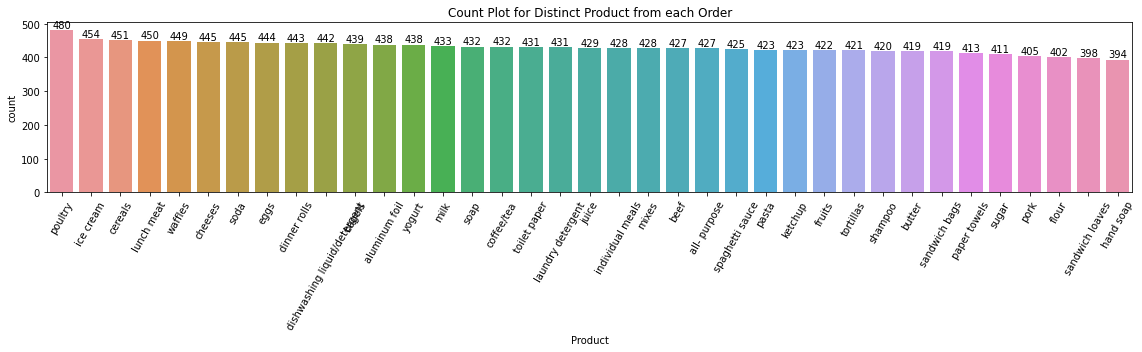

In [90]:
cols= ('Product')

fig, axes = plt.subplots(nrows=1)
fig.set_size_inches(16,5)
ax_count=sns.countplot(x='Product', data=df_distinct,order = df_distinct['Product'].value_counts().index ) 
ax_count.set(xlabel='Product',title='Count Plot for Distinct '+'Product' + ' from each Order')
plt.xticks(rotation=60)
plt.tight_layout()
for container in ax_count.containers:
    ax_count.bar_label(container)

In [91]:
df_distinct

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose
...,...,...,...
20634,25-02-2020,1138,soda
20637,25-02-2020,1138,paper towels
20638,26-02-2020,1139,soda
20639,26-02-2020,1139,laundry detergent
